In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [3]:
con = sqlite3.connect('/content/drive/MyDrive/School21/day12_team/data/checking-logs.sqlite')

# Task 3: Столбиковая диаграмма (barchart)

У нас есть еще один вопрос, на который необходимо ответить: когда пользователи обычно выполняют лабораторные задания (делают коммиты): ночью, утром, днем или вечером? И как их поведение менялось с течением времени?
Выполните необходимые шаги по созданию следующего графика:

[Ссылка на картнку из GitLab](https://repos.21-school.ru/students/DS_project_12.ID_650571/Team__TL__carrikas_.BiNbTHfeQBynSTLdmCw1dg/DS_project_12-0/-/raw/develop/misc/images/d12_03.png)

## 1. Анализируйте только пользователей, а не администраторов.
## 2. Используйте фильтр status = 'ready' для коммитов.
## 3. Размеры шрифта и figsize такие же, как и раньше (Размер шрифта — 8, figsize — 15,8)
## 4. Ночь — с 0:00:00 до 03:59:59, утро — с 04:00:00 до 09:59:59, день — с 10:00:00 до 16:59:59, вечер — с 17:00:00 до 23:59:59.
## 5. Выберите цветовую палитру по своему вкусу, не обязательно использовать те же самые цвета, что на графике выше.



In [4]:
pd.io.sql.read_sql("SELECT * from checker LIMIT 3", con)

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1


In [5]:
checker = pd.io.sql.read_sql("""
            SELECT DATE(timestamp) as date, TIME(timestamp) as time
            FROM checker
            WHERE uid LIKE 'user_%' and uid NOT LIKE 'admin_%'
                  and status = 'ready'
                      """, con)
checker['hour'] = pd.DatetimeIndex(checker['time']).hour
checker

,date,time,hour
0,2020-04-17,05:19:02,5
1,2020-04-17,05:22:45,5
2,2020-04-17,05:34:24,5
3,2020-04-17,05:43:27,5
4,2020-04-17,05:46:32,5
...,...,...,...
1681,2020-05-21,20:01:48,20
1682,2020-05-21,20:18:54,20
1683,2020-05-21,20:19:06,20
1684,2020-05-21,20:22:41,20


In [6]:
checker['daytime'] = pd.cut(checker['hour'], 
                              bins=[0, 4, 10, 17, 24],
                              labels=['night', 'morning', 'afternoon', 'evening'], 
                              right=False)

checker

,date,time,hour,daytime
0,2020-04-17,05:19:02,5,morning
1,2020-04-17,05:22:45,5,morning
2,2020-04-17,05:34:24,5,morning
3,2020-04-17,05:43:27,5,morning
4,2020-04-17,05:46:32,5,morning
...,...,...,...,...
1681,2020-05-21,20:01:48,20,evening
1682,2020-05-21,20:18:54,20,evening
1683,2020-05-21,20:19:06,20,evening
1684,2020-05-21,20:22:41,20,evening


In [7]:
checker_count = checker.copy()
checker_count = checker_count.groupby(['date', 'daytime']).size().reset_index(name='count') \
                .pivot(index='date', columns = 'daytime', values='count')
checker_count.head()

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,7,6,0
2020-04-18,0,1,19,19
2020-04-19,1,2,9,6
2020-04-20,0,0,8,8
2020-04-21,0,0,0,13


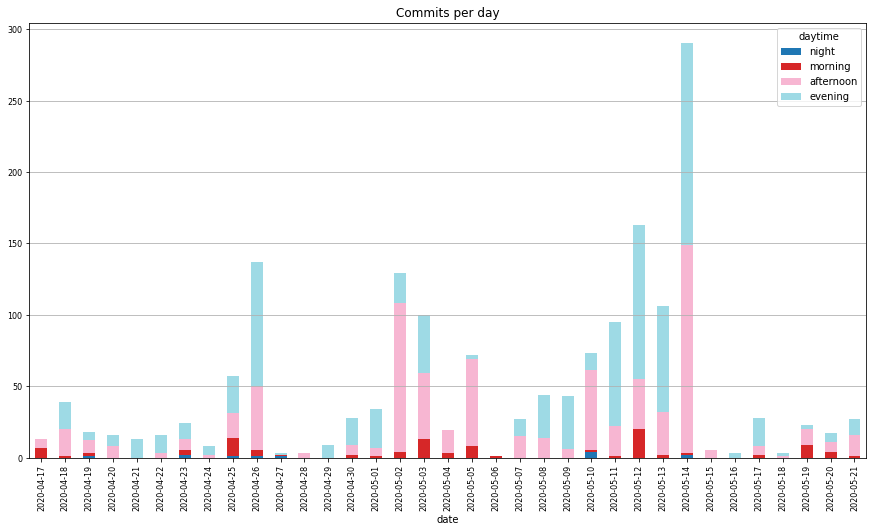

In [8]:
checker_count.plot.bar(figsize= (15, 8), stacked = True,  
                        color = ('#1f77b4', '#d62728', '#f7b6d2', '#9edae5'),
                        title="Commits per day",
                        rot=90, 
                        fontsize=8)
plt.grid(axis='y')
plt.show()

## 6. В конце Jupyter Notebook создайте markdown-ячейки и вставьте в них следующие вопросы.


  * «Когда пользователи обычно выполняют лабораторные задания: ночью, утром, днем или вечером?». Ответ — два наиболее распространенных периода времени.
  
**Ответ:**

        день и вечер



* «В какой день имеется наибольшее количество коммитов и одновременно с этим количество коммитов вечером выше, чем днем?» Ответ — дата этого дня.

**Ответ:**

     
       2020-05-12

**- Закрытие соединение с базой данных**

In [9]:
con.close()